In [52]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.metrics import r2_score, roc_auc_score, confusion_matrix
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from plotnine import *
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

**Clean the data**

In [8]:
heart = pd.read_csv("/Users/alexandra/Desktop/GSB-544/Labs/Lab7/heart_attack.csv")
heart.dropna(inplace=True)
heart.head()

,age,sex,cp,trtbps,chol,restecg,thalach,output
0,63,1,3,145,233,0,150,1
1,37,1,2,130,250,1,187,1
2,56,1,1,120,236,1,178,1
3,57,0,0,120,354,1,163,1
4,57,1,0,140,192,1,148,1


# Part One: Fitting Models
We will use medical data to predict the likelihood of a person experiencing an exercise-induced heart attack.

### KNN

In [18]:
#define x and y
X = heart.drop(columns=['output'])  
y = heart['output'] 

In [32]:
ct = ColumnTransformer(
    [
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

knn_model1 = Pipeline(
    [("preprocessing", ct),
     ("knn", KNeighborsClassifier())]  
    
).set_output(transform="pandas")


#find best neighbors
param_knn1 = {
    'knn__n_neighbors': np.arange(1, 100) 
}

#gridsearch
grid_search = GridSearchCV(knn_model1, param_knn1, cv=5, scoring='roc_auc', n_jobs=-1)

# fit data
grid_search.fit(X, y)

best_knn = grid_search.best_estimator_
best_roc_auc = grid_search.best_score_
best_k = grid_search.best_params_['knn__n_neighbors']

# Report the best ROC AUC score from cross-validation
print(f"Best ROC AUC from Cross-Validation: {best_roc_auc:.4f}")
print(f"Best k (number of neighbors): {best_k}")



Best ROC AUC from Cross-Validation: 0.8507
Best k (number of neighbors): 54
Best ROC AUC from Cross-Validation: 0.8507
Best k (number of neighbors): 54


The best ROC AUC from Ccross validation is 0.8507, which means that the model has an 85.07% chance of predicting if the person will have a heart attack. This is pretty good. I got this with a model that had 54 neighbors.

In [47]:
#knn pipeline with best neightbor 54
knn_model2 = Pipeline(
    [("preprocessing", ct),
     ("knn", KNeighborsClassifier(n_neighbors= 54))]  
    
).set_output(transform="pandas")

knn_model2.fit(X, y)

y_pred_knn2 = knn_model2.predict(X)  

,not at risk,at risk
not at risk,94,33
at risk,24,122


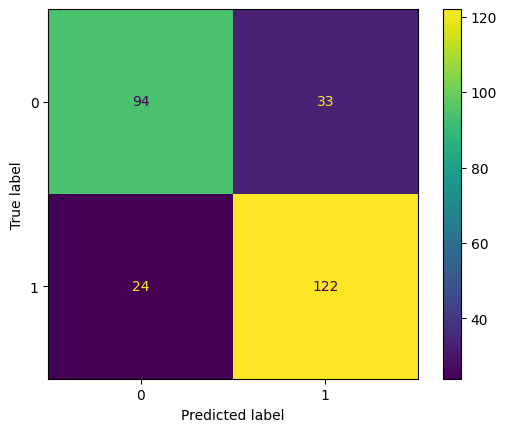

In [48]:
#matrix
cm1= confusion_matrix(y, y_pred_knn2)
cm1
ConfusionMatrixDisplay(cm1).plot()

class_names = ["not at risk", "at risk"]
conf_matrix_knn = pd.DataFrame(cm1, index=class_names, columns=class_names)
conf_matrix_knn


## Q2: Logistic Regression

In [38]:
ct = ColumnTransformer(
    [
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

log_model1 = Pipeline(
    [("preprocessing", ct),
    ("log_reg", LogisticRegression())] 
    
).set_output(transform="pandas")


#find best neighbors
param_log1 = {'log_reg__C': [0.01, 0.1, 1, 10, 100]}

#gridsearch
grid_search2 = GridSearchCV(log_model1, param_log1, cv=5, scoring='roc_auc', n_jobs=-1)

# fit data
grid_search2.fit(X, y)
  
#best C
best_C_log1 = grid_search2.best_params_['log_reg__C']
best_roc_auc_log1 = grid_search2.best_score_


print("Log Model:")
print(f"param {best_C_log1}")
print(f"ROC AUC {best_roc_auc_log1}")

Log Model:
param 0.01
ROC AUC 0.8546433244916003
Log Model:
param 0.01
ROC AUC 0.8546433244916003


In [43]:
#log pipeline with best C
log_model2 = Pipeline(
    [("preprocessing", ct),
    ("log_reg", LogisticRegression(C=0.01))] 
).set_output(transform="pandas")

log_model2.fit(X, y)

y_pred_log = log_model2.predict(X)  

,not at risk,at risk
not at risk,88,39
at risk,19,127


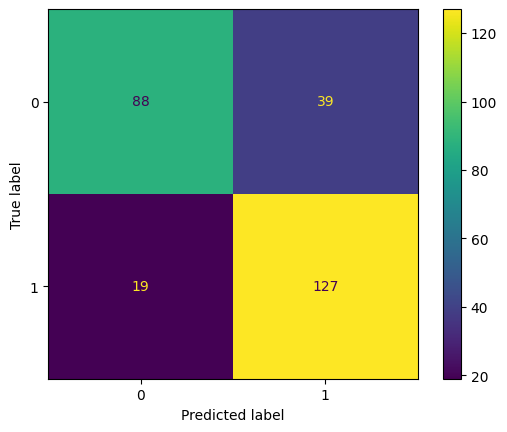

In [44]:
#matrix
cm2= confusion_matrix(y, y_pred_log)
cm2
ConfusionMatrixDisplay(cm2).plot()

class_names = ["not at risk", "at risk"]
conf_matrix_log = pd.DataFrame(cm2, index=class_names, columns=class_names)
conf_matrix_log


### Q3: Decision Tree

In [63]:
ct = ColumnTransformer(
    [
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

#decsion tree pipeline
dt_model1 = Pipeline(
    [("preprocessing", ct),
     ("decision_tree", DecisionTreeClassifier())]
).set_output(transform="pandas")


param_dt = {'decision_tree__min_impurity_decrease': [0.0, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

grid_search_dt = GridSearchCV(dt_model1, param_dt, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the grid search on the data
grid_search_dt.fit(X, y)

best_min_impurity_decrease = grid_search_dt.best_params_['decision_tree__min_impurity_decrease']
best_roc_auc_dt = grid_search_dt.best_score_
    
print("Decsion Tree")
print(f"param {best_min_impurity_decrease}")
print(f"ROC AUC {best_roc_auc_dt}")



Decsion Tree
param 0.01
ROC AUC 0.7673043324491601
Decsion Tree
param 0.01
ROC AUC 0.7673043324491601
